# Import Libraries

In [2]:
pip install pygwalker


[notice] A new release of pip available: 22.3 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer

from sklearn.tree import plot_tree

from yellowbrick.classifier import ClassPredictionError

import pygwalker as pyg

In [4]:
df = pd.read_csv("penguins_size.csv")
df.head()

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE

# Exploratory Data Analysis and Visualization

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
df.describe().T

count         mean         std     min       25%      50%  \
culmen_length_mm   342.0    43.921930    5.459584    32.1    39.225    44.45   
culmen_depth_mm    342.0    17.151170    1.974793    13.1    15.600    17.30   
flipper_length_mm  342.0   200.915205   14.061714   172.0   190.000   197.00   
body_mass_g        342.0  4201.754386  801.954536  2700.0  3550.000  4050.00   

                      75%     max  
culmen_length_mm     48.5    59.6  
culmen_depth_mm      18.7    21.5  
flipper_length_mm   213.0   231.0  
body_mass_g        4750.0  6300.0

In [7]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [8]:
df = df.dropna()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [10]:
df.head()

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
4  Adelie  Torgersen              36.7             19.3              193.0   
5  Adelie  Torgersen              39.3             20.6              190.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
4       3450.0  FEMALE  
5       3650.0    MALE

In [11]:
df["sex"].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [12]:
df["island"].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [13]:
df["species"].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [14]:
df[df["sex"]== "."]

species  island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
336  Gentoo  Biscoe              44.5             15.7              217.0   

     body_mass_g sex  
336       4875.0   .

In [15]:
df[df.species == "Gentoo"].groupby("sex").describe().T

sex                           .       FEMALE         MALE
culmen_length_mm  count     1.0    58.000000    61.000000
                  mean     44.5    45.563793    49.473770
                  std       NaN     2.051247     2.720594
                  min      44.5    40.900000    44.400000
                  25%      44.5    43.850000    48.100000
                  50%      44.5    45.500000    49.500000
                  75%      44.5    46.875000    50.500000
                  max      44.5    50.500000    59.600000
culmen_depth_mm   count     1.0    58.000000    61.000000
                  mean     15.7    14.237931    15.718033
                  std       NaN     0.540249     0.741060
                  min      15.7    13.100000    14.100000
                  25%      15.7    13.800000    15.200000
                  50%      15.7    14.250000    15.700000
                  75%      15.7    14.600000    16.100000
                  max      15.7    15.500000    17.300000
flipper_length_mm count     1.0    58.000000    61.000000
                  mean    217.0   212.706897   221.540984
                  std       NaN     3.897856     5.673252
                  min     217.0   203.000000   208.000000
                  25%     217.0   210.000000   218.000000
                  50%     217.0   212.000000   221.000000
                  75%     217.0   215.000000   225.000000
                  max     217.0   222.000000   231.000000
body_mass_g       count     1.0    58.000000    61.000000
                  mean   4875.0  4679.741379  5484.836066
                  std       NaN   281.578294   313.158596
                  min    4875.0  3950.000000  4750.000000
                  25%    4875.0  4462.500000  5300.000000
                  50%    4875.0  4700.000000  5500.000000
                  75%    4875.0  4875.000000  5700.000000
                  max    4875.0  5200.000000  6300.000000

In [16]:
df.loc[336, "sex"] = "MALE"

In [17]:
df.sex.value_counts()

MALE      169
FEMALE    165
Name: sex, dtype: int64

In [18]:
df["species"].value_counts()

Adelie       146
Gentoo       120
Chinstrap     68
Name: species, dtype: int64

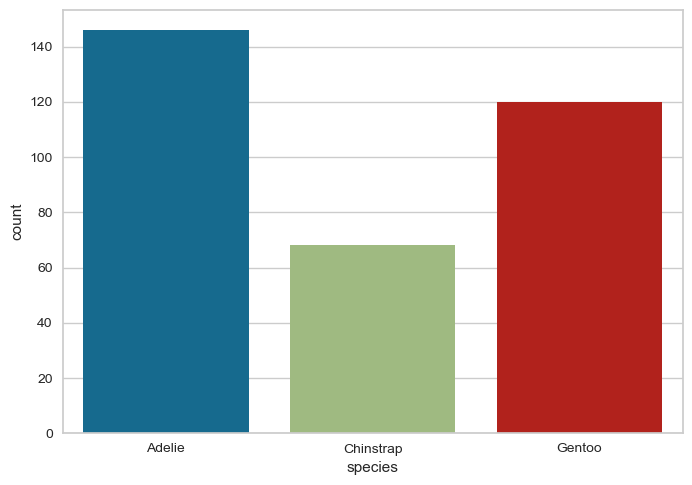

In [19]:
sns.countplot(x = "species", data = df);

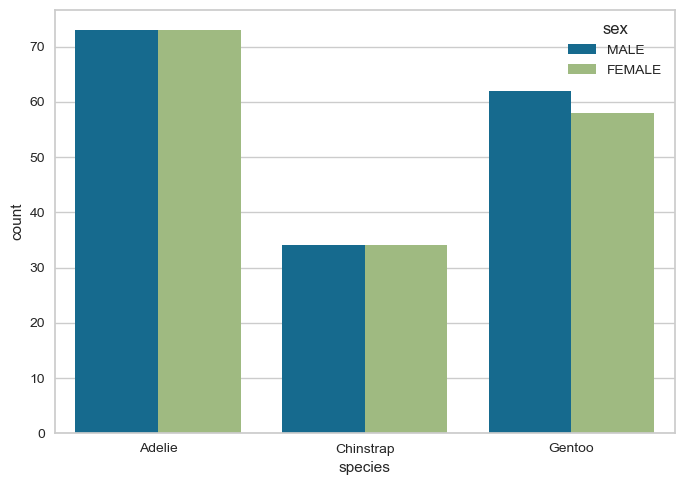

In [20]:
sns.countplot(x = "species", data = df, hue = "sex");

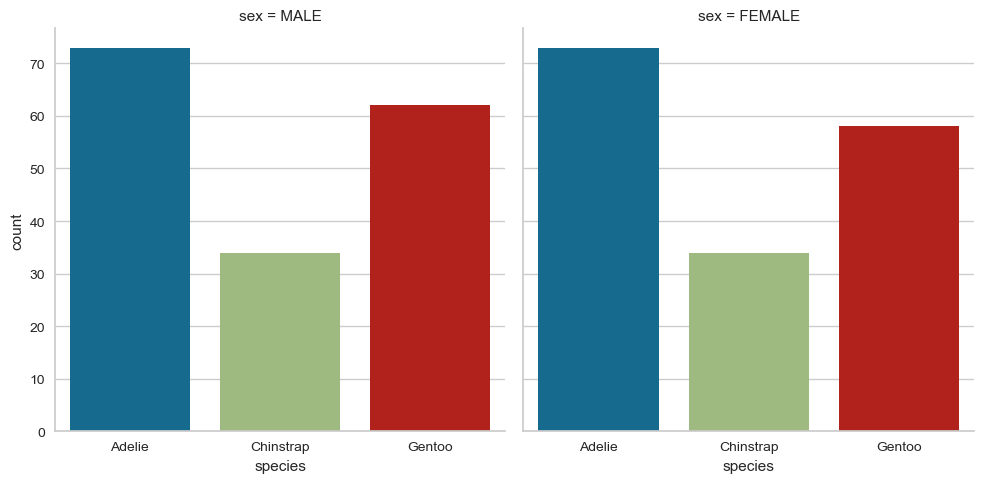

In [21]:
sns.catplot(x = 'species', data = df, kind = 'count',col = 'sex');

<Figure size 1200x600 with 0 Axes>

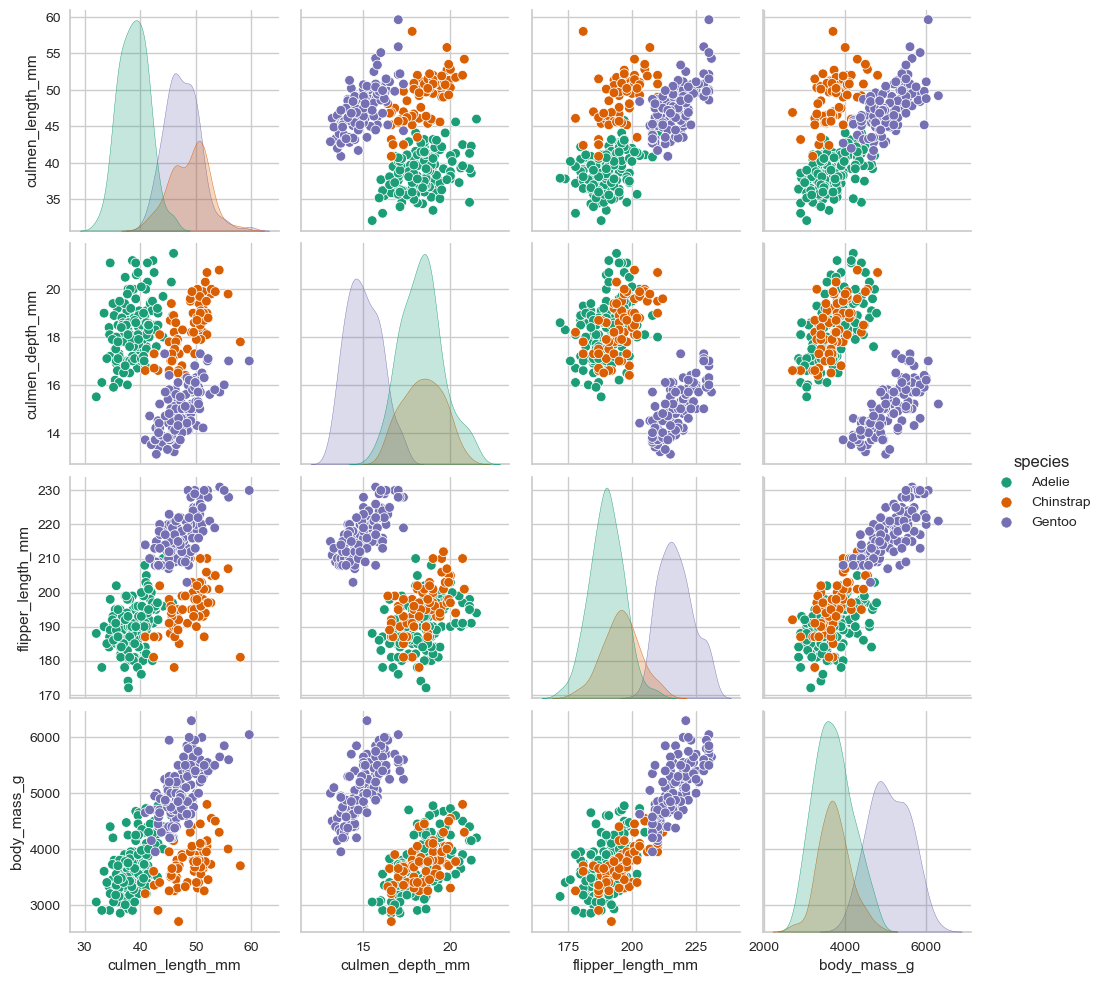

In [22]:
plt.figure(figsize=(12,6))
sns.pairplot(df,hue='species',palette='Dark2')
plt.show()

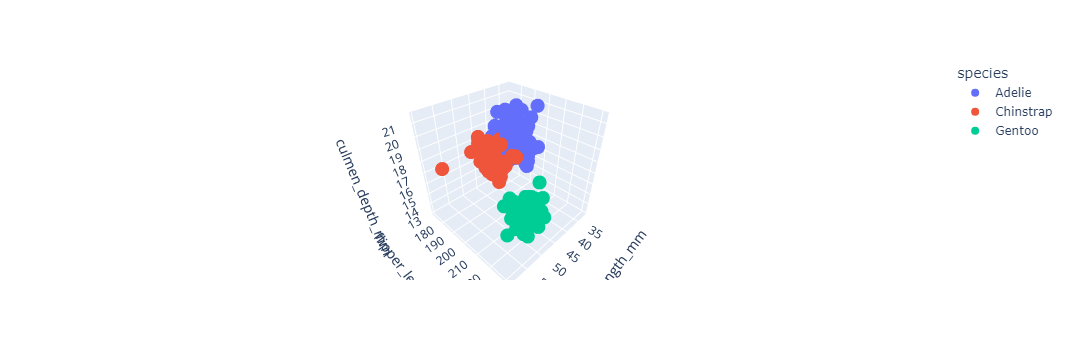

In [23]:
fig = px.scatter_3d(df, 
                    x = 'culmen_length_mm',
                    y = 'flipper_length_mm',
                    z = 'culmen_depth_mm',
                    color = 'species')
fig.show()

In [24]:
pyg.walk(df)

Box(children=(HTML(value='<div id="ifr-pyg-0" style="height: auto">\n    <head>\n        <meta http-equiv="Con…

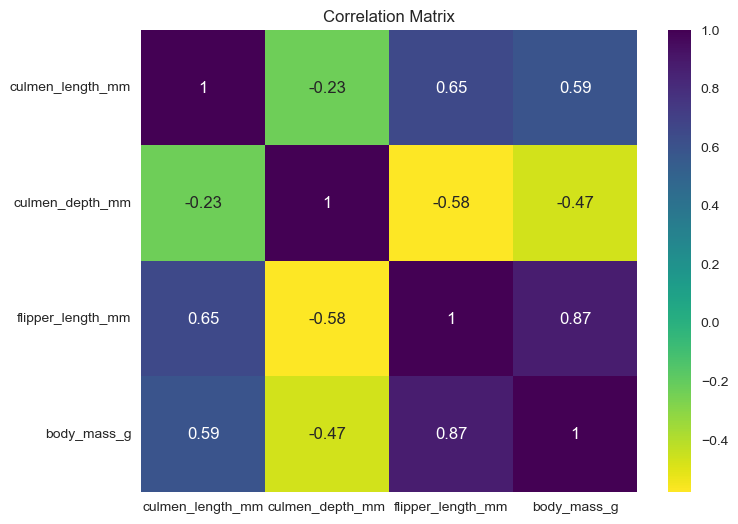

In [25]:
plt.figure(figsize = (8,6))
sns.heatmap(df.select_dtypes("number").corr(), annot = True, cmap = 'viridis_r')
plt.title("Correlation Matrix")

plt.show()

* Eğerki 0.87 olan değer 0.90 üzerinde olup multicolinearty sorunu olsa idi

Karar ağaçları çoklu doğrusal bağlantı (multicollinearity) problemlerine karşı dayanıklıdır çünkü bu modeller doğrusal olmadığı için featureler arasındaki doğrusal ilişkileri dikkate almazlar. Yani, bir karar ağacı modeli eğitirken multicollinearity'den kaynaklanan bir sorun yaşanmaz.

# Feature Engineering

In [26]:
df.drop("species", axis = 1)

island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0    Torgersen              39.1             18.7              181.0   
1    Torgersen              39.5             17.4              186.0   
2    Torgersen              40.3             18.0              195.0   
4    Torgersen              36.7             19.3              193.0   
5    Torgersen              39.3             20.6              190.0   
..         ...               ...              ...                ...   
338     Biscoe              47.2             13.7              214.0   
340     Biscoe              46.8             14.3              215.0   
341     Biscoe              50.4             15.7              222.0   
342     Biscoe              45.2             14.8              212.0   
343     Biscoe              49.9             16.1              213.0   

     body_mass_g     sex  
0         3750.0    MALE  
1         3800.0  FEMALE  
2         3250.0  FEMALE  
4         3450.0  FEMALE  
5         3650.0    MALE  
..           ...     ...  
338       4925.0  FEMALE  
340       4850.0  FEMALE  
341       5750.0    MALE  
342       5200.0  FEMALE  
343       5400.0    MALE  

[334 rows x 6 columns]

In [27]:
pd.get_dummies(df.drop("species", axis = 1), drop_first = True).astype(float)

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0                39.1             18.7              181.0       3750.0   
1                39.5             17.4              186.0       3800.0   
2                40.3             18.0              195.0       3250.0   
4                36.7             19.3              193.0       3450.0   
5                39.3             20.6              190.0       3650.0   
..                ...              ...                ...          ...   
338              47.2             13.7              214.0       4925.0   
340              46.8             14.3              215.0       4850.0   
341              50.4             15.7              222.0       5750.0   
342              45.2             14.8              212.0       5200.0   
343              49.9             16.1              213.0       5400.0   

     island_Dream  island_Torgersen  sex_MALE  
0             0.0               1.0       1.0  
1             0.0               1.0       0.0  
2             0.0               1.0       0.0  
4             0.0               1.0       0.0  
5             0.0               1.0       1.0  
..            ...               ...       ...  
338           0.0               0.0       0.0  
340           0.0               0.0       0.0  
341           0.0               0.0       1.0  
342           0.0               0.0       0.0  
343           0.0               0.0       1.0  

[334 rows x 7 columns]

# Train | Test Split

In [28]:
X = pd.get_dummies(df.drop('species',axis = 1), drop_first = True)
y = df['species']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [30]:
X_train.shape

(233, 7)

# Modelling - Decision Tree Classifier

In [31]:
DT_model = DecisionTreeClassifier(random_state = 101)

In [32]:
DT_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=101)

In [33]:
y_pred = DT_model.predict(X_test)

# Model Performance on Classification Tasks

In [34]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

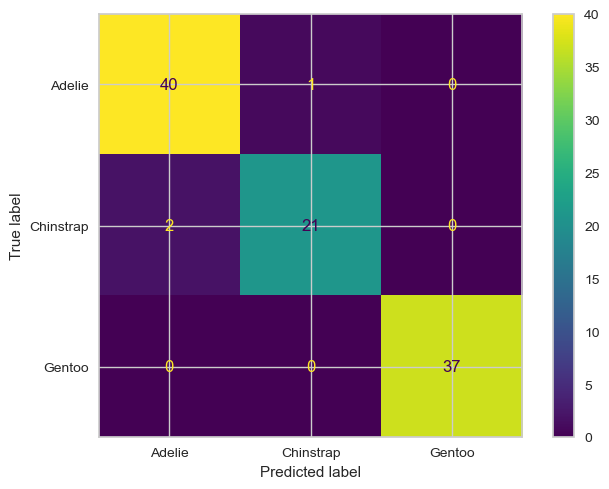

In [35]:
plot_confusion_matrix(DT_model, X_test, y_test);

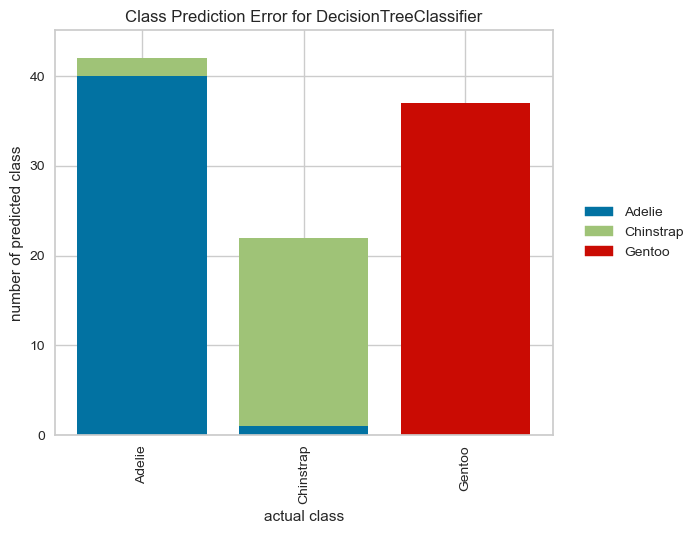

In [36]:
visualizer = ClassPredictionError(DT_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

In [37]:
eval_metric(DT_model, X_train, y_train, X_test, y_test)

Test_Set
[[40  1  0]
 [ 2 21  0]
 [ 0  0 37]]
              precision    recall  f1-score   support

      Adelie       0.95      0.98      0.96        41
   Chinstrap       0.95      0.91      0.93        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.97      0.96      0.97       101
weighted avg       0.97      0.97      0.97       101


Train_Set
[[105   0   0]
 [  0  45   0]
 [  0   0  83]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       105
   Chinstrap       1.00      1.00      1.00        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



micro = bütün skorlarım dengedeyse

macro = datamda bir dengesizlik varsa bakıyordum

weight = eğer datam dengesiz ancak ben sayısı yüksek olana göre bakmak istiyorsam kullanıyordum

# Cross Validate

In [38]:
model = DecisionTreeClassifier(random_state = 101)

scores = cross_validate(model, X_train, y_train, 
                        scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

fit_time  score_time  test_accuracy  test_precision_micro  \
1   0.023499    0.022987       0.958333              0.958333   
2   0.009994    0.019987       0.958333              0.958333   
3   0.010993    0.016989       0.916667              0.916667   
4   0.006989    0.016993       0.956522              0.956522   
5   0.013991    0.040976       1.000000              1.000000   
6   0.020986    0.023986       1.000000              1.000000   
7   0.021982    0.033979       1.000000              1.000000   
8   0.012991    0.021986       1.000000              1.000000   
9   0.021988    0.022987       0.869565              0.869565   
10  0.008995    0.015992       1.000000              1.000000   

    test_recall_micro  test_f1_micro  
1            0.958333       0.958333  
2            0.958333       0.958333  
3            0.916667       0.916667  
4            0.956522       0.956522  
5            1.000000       1.000000  
6            1.000000       1.000000  
7            1.000000       1.000000  
8            1.000000       1.000000  
9            0.869565       0.869565  
10           1.000000       1.000000

In [39]:
df_scores.mean()[2:]

test_accuracy           0.965942
test_precision_micro    0.965942
test_recall_micro       0.965942
test_f1_micro           0.965942
dtype: float64

# Feature Importances

In [40]:
# Bu ağaç tabanlı modellerde Feature importance çıktısı alabiliyoruz, hatta Random Forest çıktısına rahat bir şekilde güvenebiliriz

In [ ]:
# Tree base modeller çoklu doğrusallıktan(multicolonirety) etkilenmezler 

In [41]:
DT_model.feature_importances_

array([0.32591819, 0.05289252, 0.54282921, 0.        , 0.07836008,
       0.        , 0.        ])

In [42]:
df_f_i = pd.DataFrame(index = X.columns, data = DT_model.feature_importances_, 
                      columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
df_f_i

Feature Importance
flipper_length_mm            0.542829
culmen_length_mm             0.325918
island_Dream                 0.078360
culmen_depth_mm              0.052893
body_mass_g                  0.000000
island_Torgersen             0.000000
sex_MALE                     0.000000

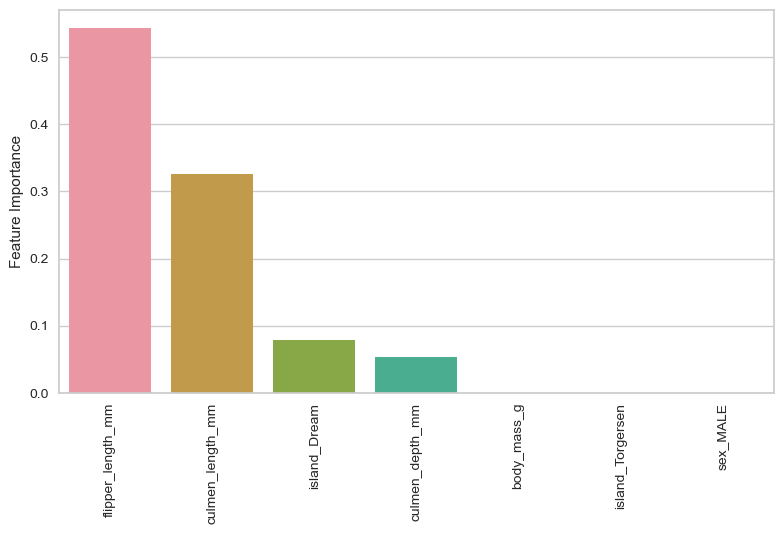

In [43]:
sns.barplot(x = df_f_i.index, y = 'Feature Importance', data = df_f_i)
plt.xticks(rotation = 90)
plt.tight_layout()

# Drop most important feature

### ÖNEMLİ

Flipper_length’i yani en onemli feature’u bir dusurun oyle bir calistirin, o olmadan belki digerlerinden daha fazla insight alacak. Flipper_length varken digerlerine 0 verdi gecti belki.

In [44]:
X2 = X.drop(columns = ["flipper_length_mm"]) 
# The feature that weighs too much on the estimate can sometimes cause overfitting.
# For this reason, the most important featur

In [45]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size = 0.3, random_state = 101)

In [46]:
DT2_model = DecisionTreeClassifier(random_state=101)

In [47]:
DT2_model.fit(X_train2, y_train2)

DecisionTreeClassifier(random_state=101)

In [48]:
eval_metric(DT2_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[41  0  0]
 [ 1 22  0]
 [ 1  0 36]]
              precision    recall  f1-score   support

      Adelie       0.95      1.00      0.98        41
   Chinstrap       1.00      0.96      0.98        23
      Gentoo       1.00      0.97      0.99        37

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101


Train_Set
[[105   0   0]
 [  0  45   0]
 [  0   0  83]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       105
   Chinstrap       1.00      1.00      1.00        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



In [49]:
DT2_model.feature_importances_

array([0.50476185, 0.11399402, 0.        , 0.37039115, 0.        ,
       0.01085298])

In [50]:
df_f_i = pd.DataFrame(index = X2.columns, data = DT2_model.feature_importances_, 
                      columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
df_f_i

Feature Importance
culmen_length_mm            0.504762
island_Dream                0.370391
culmen_depth_mm             0.113994
sex_MALE                    0.010853
body_mass_g                 0.000000
island_Torgersen            0.000000

In [51]:
model = DecisionTreeClassifier(random_state = 101)

# scores = cross_validate(model, X_train2, y_train2, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
scores = cross_validate(model, X_train2, y_train2, scoring = ["accuracy", "precision_macro", "recall_macro", "f1_macro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

fit_time  score_time  test_accuracy  test_precision_macro  \
1   0.018986    0.021047       1.000000              1.000000   
2   0.012992    0.060013       1.000000              1.000000   
3   0.010993    0.043017       0.958333              0.944444   
4   0.009027    0.013991       1.000000              1.000000   
5   0.008992    0.018030       1.000000              1.000000   
6   0.012993    0.018505       1.000000              1.000000   
7   0.009997    0.034976       1.000000              1.000000   
8   0.011998    0.015986       1.000000              1.000000   
9   0.008994    0.012992       1.000000              1.000000   
10  0.007995    0.010992       0.956522              0.962963   

    test_recall_macro  test_f1_macro  
1            1.000000       1.000000  
2            1.000000       1.000000  
3            0.966667       0.952153  
4            1.000000       1.000000  
5            1.000000       1.000000  
6            1.000000       1.000000  
7            1.000000       1.000000  
8            1.000000       1.000000  
9            1.000000       1.000000  
10           0.969697       0.964519

In [52]:
df_scores.mean()[2:]

test_accuracy           0.991486
test_precision_macro    0.990741
test_recall_macro       0.993636
test_f1_macro           0.991667
dtype: float64

In [53]:
scoring = {
           'precision-Adelie': make_scorer(precision_score,  average = None, labels = ["Adelie"]),
           'recall-Adelie': make_scorer(recall_score, average = None, labels = ["Adelie"]),
           'f1-Adelie': make_scorer(f1_score, average = None, labels = ["Adelie"]),
          
          'precision-Chinstrap': make_scorer(precision_score,  average = None, labels = ["Chinstrap"]),
          'recall-Chinstrap': make_scorer(recall_score, average = None, labels = ["Chinstrap"]),
          'f1-Chinstrap': make_scorer(f1_score, average = None, labels = ["Chinstrap"]),
          
          
          'precision-Gentoo': make_scorer(precision_score,  average = None, labels = ["Gentoo"]),
          'recall-Gentoo': make_scorer(recall_score, average = None, labels = ["Gentoo"]),
          'f1-Gentoo': make_scorer(f1_score, average = None, labels = ["Gentoo"]),
          }

In [54]:
model = DecisionTreeClassifier(max_depth=None, random_state=101)

scores = cross_validate(model, X_train2, y_train2, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision-Adelie       1.000000
test_recall-Adelie          0.980909
test_f1-Adelie              0.989975
test_precision-Chinstrap    0.983333
test_recall-Chinstrap       1.000000
test_f1-Chinstrap           0.990909
test_precision-Gentoo       0.988889
test_recall-Gentoo          1.000000
test_f1-Gentoo              0.994118
dtype: float64

# Visualize the Tree

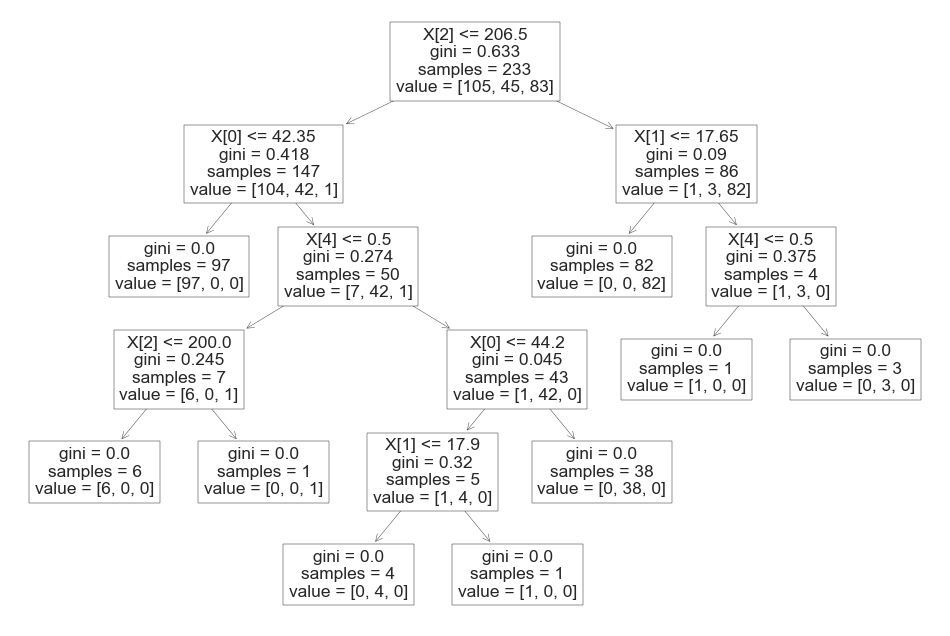

In [55]:
plt.figure(figsize = (12,8))
plot_tree(DT_model);

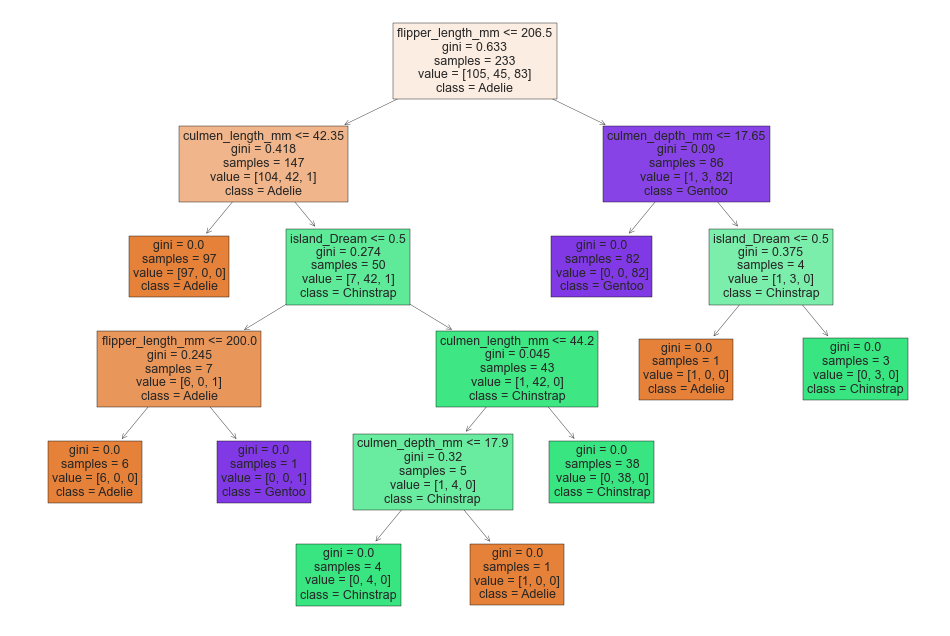

In [56]:
plt.figure(figsize= (12, 8), dpi = 100)
plot_tree(DT_model, filled = True, feature_names = X.columns, class_names = df.species.unique());

# Understanding Hyperparameters

In [57]:
def report_model(model):
    model_pred = model.predict(X_test)
    model_train_pred = model.predict(X_train)
    print('\n')
    print("Test Set")
    print(confusion_matrix(y_test, model_pred))
    print('\n')
    print(classification_report(y_test,model_pred))
    print('\n')
    print("Train Set")
    print(confusion_matrix(y_train, model_train_pred))
    print('\n')
    print(classification_report(y_train,model_train_pred))
    plt.figure(figsize = (12,8), dpi = 100)
    plot_tree(model,filled = True, feature_names = X.columns, class_names = df.species.unique());

**decision_tree:** Görselleştirilmek istenen karar ağacı nesnesi.

**max_depth:** Ağaçtaki maksimum derinlik. Eğer belirtilmezse tüm ağaç gösterilir.

**Dallanma Kriteri (Criterion):** Karar ağacının düğümlerindeki verilerin nasıl bölüneceğini belirler. Örneğin, "gini" veya "entropy" gibi kriterler kullanılabilir. Gini, Gini impurity olarak da bilinir, ve düğümdeki sınıf karışıklığını ölçerken, entropy, veri kümesindeki düzensizliği ölçer.

**Minimum Örnek Sayısı Yaprak (Min Samples Leaf):** Bir yaprağın oluşturulması için gerekli minimum örnek sayısını belirler. Bu, küçük yaprak düğümlerini kaldırmak için kullanışlıdır.

**Maksimum Özellik Sayısı (Max Features):** Bir düğümde değerlendirilecek maksimum özellik sayısını belirler. Bu, özelliklerin rastgele alt kümeleriyle çalışmak için kullanılabilir ve aşırı uymayı azaltmaya yardımcı olabilir.

**feature_names:** Özelliklerin (features) isimleri. Bu sayede ağaç üzerinde gösterilen özelliklerin daha anlamlı isimleri olabilir.

**class_names:** Hedef sınıfların (target classes) isimleri. Bu, ağacın sonunda veri noktalarının hangi sınıflara ait olduğunu göstermek için kullanılır.

**label:** 'all', 'root', 'none' arasında bir değer olabilir. Hangi düğüm etiketlerinin gösterilip gösterilmeyeceğini belirtir.

**filled:** Boolean değeri. True olduğunda, düğümler sınıflara göre renklendirilir.

**impurity:** Boolean değeri. True olduğunda, düğümlerde saflık (genellikle Gini saflığı) gösterilir.

**node_ids:** Boolean değeri. True olduğunda, her düğüm için düğüm ID'leri gösterilir.

**proportion:** Boolean değeri. True olduğunda, her düğümdeki örneklerin oranı gösterilir.

**rounded:** Boolean değeri. True olduğunda, düğüm kutularının köşeleri yuvarlanır.

**precision:** Noktadan sonraki basamak sayısı. Bu, gösterilen ondalıklı değerlerin hassasiyetini ayarlar.

**ax:** Matplotlib eksen nesnesi. Eğer belirtilmezse mevcut eksen kullanılır veya yeni bir eksen oluşturulur.

**fontsize:** Yazı tipi boyutu. Düğümlerdeki metnin boyutunu belirtmek için kullanılır.

## Max Depth

In [58]:
# pruned_tree = DecisionTreeClassifier(max_depth=None, random_state=101,  min_samples_split=8,min_samples_leaf=4)
pruned_tree = DecisionTreeClassifier(max_depth = 2, random_state = 101)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=101)



Test Set
[[36  5  0]
 [ 1 22  0]
 [ 0  0 37]]


              precision    recall  f1-score   support

      Adelie       0.97      0.88      0.92        41
   Chinstrap       0.81      0.96      0.88        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.94       101
   macro avg       0.93      0.94      0.93       101
weighted avg       0.95      0.94      0.94       101



Train Set
[[97  8  0]
 [ 0 45  0]
 [ 0  1 82]]


              precision    recall  f1-score   support

      Adelie       1.00      0.92      0.96       105
   Chinstrap       0.83      1.00      0.91        45
      Gentoo       1.00      0.99      0.99        83

    accuracy                           0.96       233
   macro avg       0.94      0.97      0.95       233
weighted avg       0.97      0.96      0.96       233



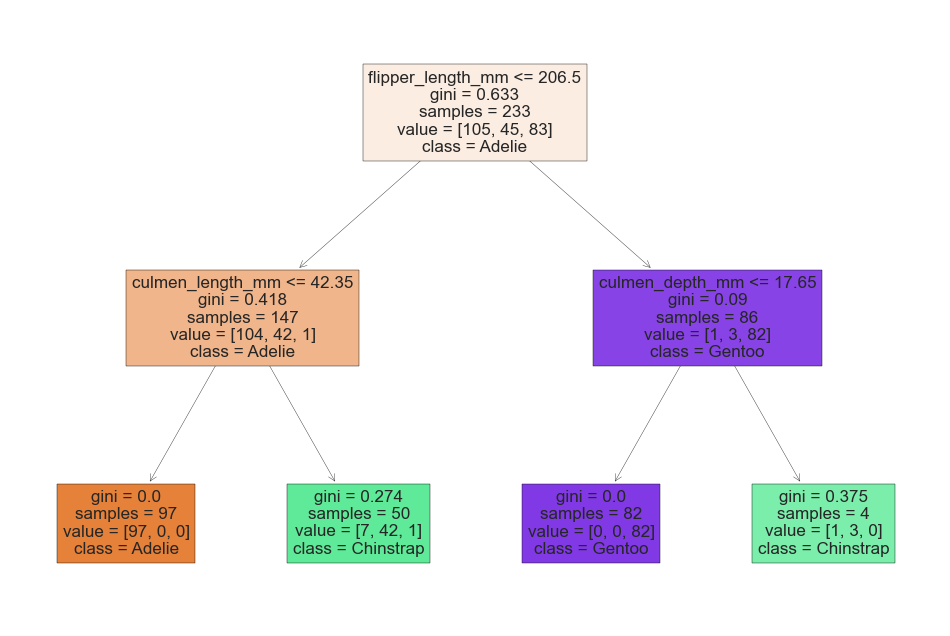

In [59]:
report_model(pruned_tree)

## Max Leaf Nodes

In [60]:
pruned_tree_2 = DecisionTreeClassifier(max_leaf_nodes = 7, random_state = 101)
pruned_tree_2.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=7, random_state=101)



Test Set
[[40  1  0]
 [ 1 22  0]
 [ 0  0 37]]


              precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        41
   Chinstrap       0.96      0.96      0.96        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101



Train Set
[[104   1   0]
 [  0  45   0]
 [  0   0  83]]


              precision    recall  f1-score   support

      Adelie       1.00      0.99      1.00       105
   Chinstrap       0.98      1.00      0.99        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           1.00       233
   macro avg       0.99      1.00      0.99       233
weighted avg       1.00      1.00      1.00       233



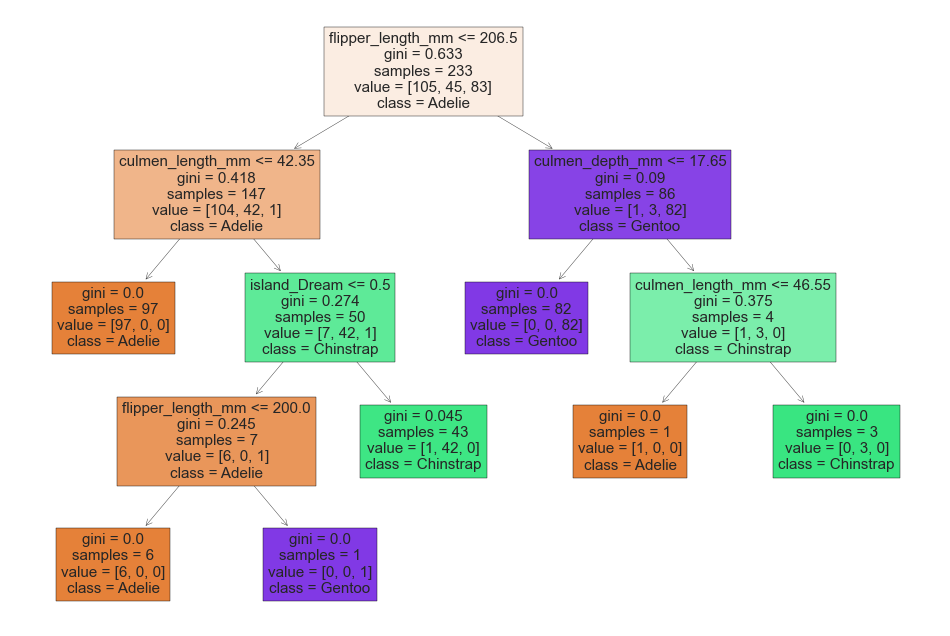

In [61]:
report_model(pruned_tree_2)

## Criterion

In [62]:
entropy_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 101)
entropy_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=101)



Test Set
[[40  1  0]
 [ 2 21  0]
 [ 0  0 37]]


              precision    recall  f1-score   support

      Adelie       0.95      0.98      0.96        41
   Chinstrap       0.95      0.91      0.93        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.97      0.96      0.97       101
weighted avg       0.97      0.97      0.97       101



Train Set
[[105   0   0]
 [  0  45   0]
 [  0   0  83]]


              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       105
   Chinstrap       1.00      1.00      1.00        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



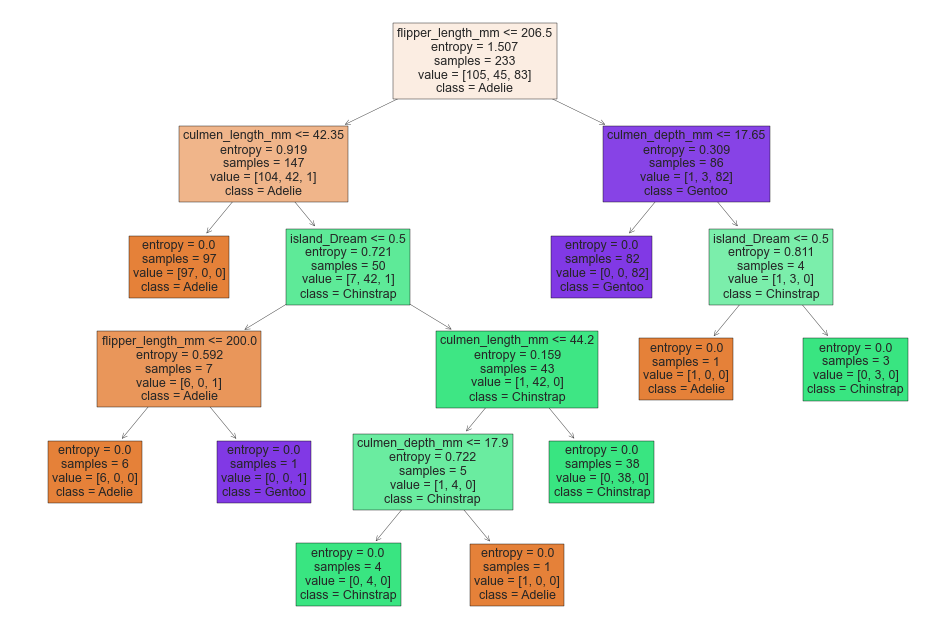

In [63]:
report_model(entropy_tree)

## Max_features, Splitter

In [64]:
tree = DecisionTreeClassifier(splitter = "random", max_features = None)
# splitter: to select the feature to set the root node, (default: "best"), max_features for desicion nodes
tree.fit(X_train, y_train)

DecisionTreeClassifier(splitter='random')



Test Set
[[39  2  0]
 [ 1 22  0]
 [ 0  0 37]]


              precision    recall  f1-score   support

      Adelie       0.97      0.95      0.96        41
   Chinstrap       0.92      0.96      0.94        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.96      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101



Train Set
[[105   0   0]
 [  0  45   0]
 [  0   0  83]]


              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       105
   Chinstrap       1.00      1.00      1.00        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



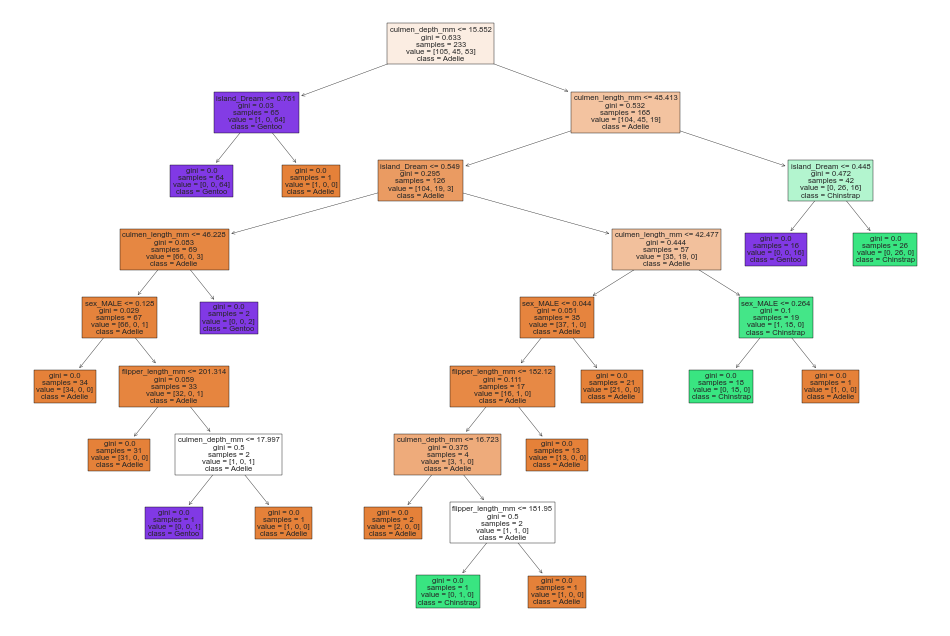

In [65]:
report_model(tree)

## Find Best Parameters

In [74]:
from sklearn.model_selection import GridSearchCV

In [75]:
model = DecisionTreeClassifier(random_state = 101)

In [76]:
param_grid = {"splitter":["best", "random"],
              "max_features":[None, "auto", "log2", 2, 3,4, 5,6, 7],
              "max_depth": [None, 2, 3, 4, 5],
              "min_samples_leaf": [1, 2, 3, 4, 5, 6, 7],
              "min_samples_split": [2, 3, 5, 6, 7, 8, 9]} # bir yaprağın içindeki min sample miktarı
              #max_features "auto"= sqr(numberof feature)

In [77]:
grid_model = GridSearchCV(estimator = model,
                          param_grid = param_grid,
                          scoring = 'f1_micro',
                          cv = 10,
                          n_jobs = -1)

In [78]:
grid_model.fit(X_train, y_train)      # en iyi korelasyona sahip sütunun atılmamış veri seti ile

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=101),
             n_jobs=-1,
             param_grid={'max_depth': [None, 2, 3, 4, 5],
                         'max_features': [None, 'auto', 'log2', 2, 3, 4, 5, 6,
                                          7],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']},
             scoring='f1_micro')

In [79]:
grid_model.best_params_ # hepsi default değerler

{'max_depth': None,
 'max_features': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'random'}

In [81]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[39  1  1]
 [ 0 23  0]
 [ 0  0 37]]
              precision    recall  f1-score   support

      Adelie       1.00      0.95      0.97        41
   Chinstrap       0.96      1.00      0.98        23
      Gentoo       0.97      1.00      0.99        37

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101


Train_Set
[[105   0   0]
 [  0  45   0]
 [  0   0  83]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       105
   Chinstrap       1.00      1.00      1.00        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



In [82]:
grid_model.fit(X_train2, y_train2)          # en iyi korelasyona sahip sütunun atılmış veri seti

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=101),
             n_jobs=-1,
             param_grid={'max_depth': [None, 2, 3, 4, 5],
                         'max_features': [None, 'auto', 'log2', 2, 3, 4, 5, 6,
                                          7],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']},
             scoring='f1_micro')

In [83]:
grid_model.best_params_ 

{'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [84]:
eval_metric(grid_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[41  0  0]
 [ 1 22  0]
 [ 1  0 36]]
              precision    recall  f1-score   support

      Adelie       0.95      1.00      0.98        41
   Chinstrap       1.00      0.96      0.98        23
      Gentoo       1.00      0.97      0.99        37

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101


Train_Set
[[105   0   0]
 [  0  45   0]
 [  0   0  83]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       105
   Chinstrap       1.00      1.00      1.00        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



In [73]:
# best future düşürünce scorelar iyileşiyorsa, gridsearch'e bu future düşürüp girilir
# Ancak bizim bu veri setinde iki durum(best feature nin atılması veya atılmaması) arasında bir değişiklik olmadı 

**Gini Katsayısı**: Gini katsayısı, bir düğümdeki örneklere bakarak saf olmayanlığı ölçer. Gini katsayısı, bir düğümdeki rastgele seçilen bir örneğin yanlış sınıflandırılma olasılığını temsil eder. Hesaplaması daha hızlıdır çünkü logaritmik fonksiyonları içermez. Gini katsayısı, veri setinin dengeli olup olmadığına daha az duyarlıdır. Gini genellikle ikili ayrımı tercih eder.

**Entropi**: Entropi, bir düğümdeki rastgele seçilen bir örneğin belirsizliğini ölçer. Daha teknik bir ifadeyle, entropi bir düğümdeki bilgi karmaşıklığını ölçer. Entropi hesaplaması, logaritmik işlemler içerir ve bu nedenle genellikle daha yavaştır. Entropi, veri setindeki sınıf dengesizliğine daha duyarlıdır. Entropi genellikle çoklu ayrımı tercih eder.

**Bilgi Kazanımı (Information Gain)**: Bilgi kazanımı, bir özellikle ağacın dallanmasının sonucunda entropinin ne kadar azaldığını ölçer. Yani, bir özellik ne kadar çok bilgi kazanımı sağlarsa, o özellik karar ağacının o düğümünde daha önemli hale gelir. Bilgi kazanımı, entropi kullanılarak hesaplanır ve ağacın dallanma kararlarını yönlendirir.

**Log Loss**: Log loss, sınıflandırma problemlarında kullanılan bir hata ölçüsüdür. Tahmin edilen olasılıkların gerçek etiketlere ne kadar yakın olduğunu ölçer. Log loss, tahminlerin ne kadar doğru olduğunu değil, tahminlerin ne kadar kesin olduğunu ölçer. Log loss değerinin ideal değeri 0'dır. Bu, modelin tüm tahminlerini doğru yaptığı ve yanıtların kesin olduğu anlamına gelir.

Bu dört kavram, genellikle karar ağaçları ve rastgele ormanlar gibi algoritmaların performansını ölçmek ve modelin öğrenmesini yönlendirmek için kullanılır. Bunlar, bir düğümün veya bir özelliğin sınıflandırma performansını ölçmek için kullanılır. Bu ölçütler, hangi özelliğin daha fazla bilgi kazanımı sağladığını ve hangi özelliğin bir karar ağacında dallanma için daha iyi bir seçenek olduğunu belirlemeye yardımcı olur.

Ayrıca, bu ölçütler sadece karar ağaçları ve rastgele ormanlarla sınırlı değildir. Örneğin, log loss genellikle lojistik regresyon, sinir ağları ve diğer olasılık temelli sınıflandırma modellerinin performansını ölçmek için kullanılır.

Bu ölçütlerin hangisinin belirli bir durum için en uygun olduğunu belirlemek, genellikle uygulamaya, veriye ve modelin kullanıldığı bağlama bağlıdır. Bu nedenle, bu ölçütlerin etkinliği genellikle deneysel olarak belirlenir.

* **Karar ağaçları ve onların türevi olan modeller (örneğin, Rastgele Ormanlar ve Gradient Boosting), özelliklerin ölçeklendirilmesinden etkilenmez.** Yani, özelliklerinizin birinin ölçeği 1 ile 10 arasında ve diğerinin 1 ile 100.000 arasında olduğunu varsayarsak, bu karar ağaçlarının performansını etkilemez. Bu, karar ağaçlarının özelliklerin belirli bir değerden büyük veya küçük olup olmadığını kontrol etme şekli nedeniyle olur. Yani, özelliklerin ölçeğinin karar ağaçları üzerinde hiçbir etkisi yoktur.

* **Özelliklerin ölçeklendirilmesi genellikle mesafe temelli algoritmalar (örneğin, K-En Yakın Komşu ve Destek Vektör Makineleri) veya gradyan iniş kullanılan algoritmalar (örneğin, derin öğrenme modelleri) için önemlidir.** Bu tür algoritmalar, özelliklerin ölçeğinden büyük ölçüde etkilenebilir, bu yüzden genellikle veri önceden ölçeklendirilir.

* Benzer şekilde, karar ağaçları özellik seçimine de duyarlı değildir çünkü her bir özelliği ayrı ayrı değerlendirirler ve en iyi bölünme noktasını bulmak için her özelliği kullanabilirler.

* Bununla birlikte, karar ağaçları ve benzeri modellerin hazırlık aşamasında kullanılması gereken bazı ön işleme adımları vardır. Örneğin, eksik değerler genellikle doldurulmalı veya silinmeli ve kategorik değişkenler genellikle sayısal değerlere dönüştürülmelidir. Ayrıca, veri setindeki aykırı değerlerin etkisini azaltmak için bazen bazı özellik mühendislik teknikleri de uygulanabilir. Ancak bu adımlar genellikle "pipeline" işlemi olarak düşünülmez, çünkü modelin kendisi tarafından değil, veri seti üzerinde gerçekleştirilirler.